#Proyecto de aprendizaje profundo: Red Nueronal Convolucional
Integrantes:
*   Asgard Andrés Mendoza Flores - A00572566
*   Diego Mijares
*   Alberto
*   Leonardo

El primer modelo que se decidió implementar para la clasificación del dataset de Fashion MNIST ha sido una red neuronal convolucional, dicha red fungirá como la red vista dentro del programa de la clase para la realización de este proyecto.
Las Redes Neuronales Convolucionales son muy utilizadas para la tarea de clasificación de imágenes gracias a su capacidad de determinar patrones relevantes para la clasificación de las imagenes que se le alimentan. Dentro de los modelos vistos en clase se notó que pocos estaban diseñados especificamente para el reconocimiento y la clasificación en base a imágenes. Tres características que destacamos al seleccionar este modelo son las siguientes:


1.   Detección y ajuste automático de rasgos para la clasificación en las imágenes.
2.   Robustez para lidiar con el ruido en las imágenes: Las CNN tienen una gran cantidad de herramientas que les ayuda a mitigar el efecto que el ruido pueda tener en el desempeño del modelo; algunas de las herramientas probadas fueron las capas "dropout" y la normalización en batches.
3.   Reputación sobre una gran presición en tareas de clasificación de imágenes cuando se consigue generar una buena estructura y un buen ajuste de hiper-parámetros.




Importación de librerías

In [154]:
# importa las librerías
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection
from matplotlib import pyplot
from keras.models import Sequential


Importación y pre-procesamiento de los datos

In [119]:
# carga el conjunto de datos de dígitos MNIST
data_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = data_mnist.load_data()

In [120]:
# despliega las dimensiones de los arreglos
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [121]:
# mapea etiqueta a nombre
dicc = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
dicc


{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

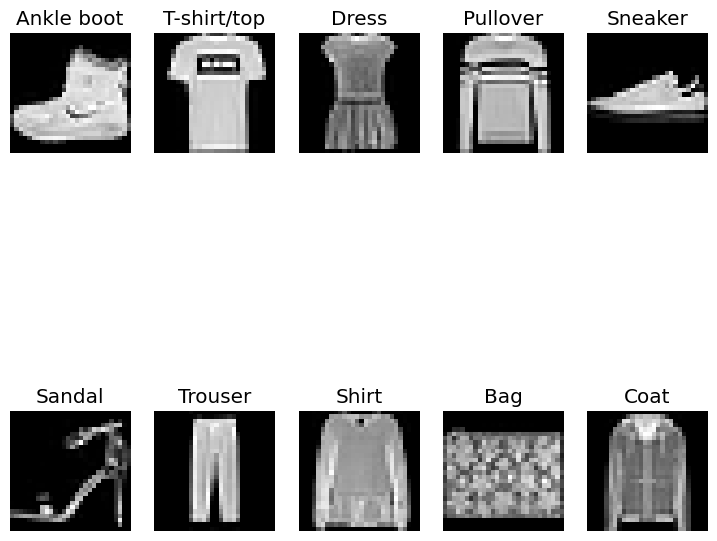

In [122]:
# despliega algunas imágenes del dataset para ver el tipo de imágenes con el que se trabajará
cc = [0,1,3,5,6,8,21,18,23,28]  # un ejemplo de cada clase/objeto.
fig=plt.figure(figsize=(9,9)) # figure size, inches
k=1
for i in cc:
  fig.add_subplot(2, 5, k)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(dicc[y_train[i]])
  plt.axis('off')
  k += 1

In [123]:
# normaliza las intensidades de los pixeles de las imágenes
x_train, x_test = x_train/255.0, x_test/255.0

El objetivo de la normalización de los valores en las imágenes es el de evitar que grandes coeficientes desbalanceen los pesos o sesgos de las unidades dentro de la red neuronal

In [124]:
# convierte etiquetas de clase enteras en código binario (one hot)
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)
print(y_train[0])
print(ytrain[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [125]:
labels = ["0","1","2","3","4","5","6","7","8","9"]

Como la las redes neuronales convolucionales trabajan con una última capa densa que tiene asignada una unidad por cada posible categoría dentro dataset se debe de binarizar el resultado para cada una de las imágenes dentro del dataset

In [126]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#Implementación de la CNN LeNet-5 - Basada en la Actividad 5 de clase (Redes Convolucionales)



En clase se revisó esta estructura en particular de una Red Neuronal Convolucional desarrollada por Yann LeCun, Léon Bottou, Yoshua Bengio, y Patrick Haffner en 1998 para el reconocimiento de dígitos escritos a mano. En una actividad de clase se probó la alta eficiencia de esta arquitectura para clasificar las imágenes de la base de datos de Fashion_MNIST por lo que se ha planteado tomar esta arquitectura como base para retarnos a mejorar su desempeño
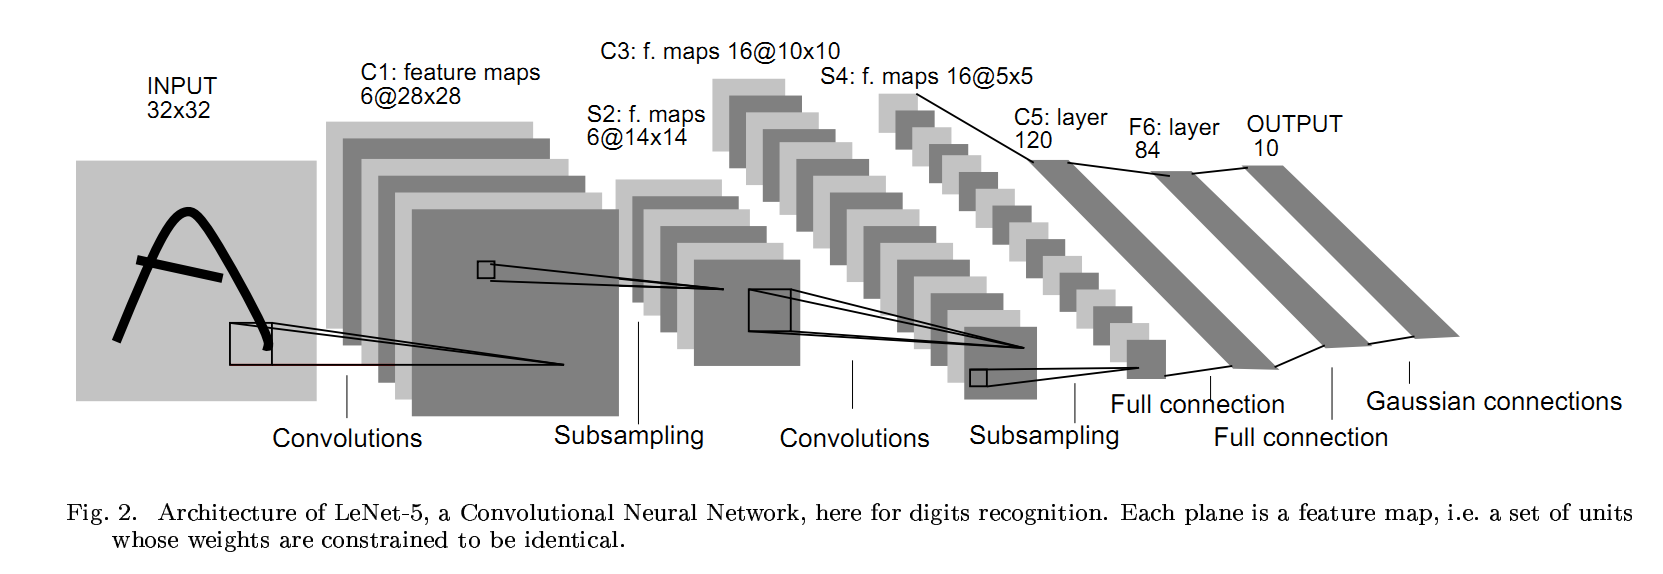

In [127]:
# crea el modelo LeNet-5
model = tf.keras.models.Sequential([

   # C1: feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),

   # S2: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # C3: feature maps: Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'),

   # S4: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # C5: Flatten & Fully connection:
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(120, activation='tanh'),

   # F6: Fully conection:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output: Softmax
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])

In [128]:
# define algunos hiper-parámetros
n_epochs=20
n_batch=64
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [129]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt,
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [130]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5861 - loss: 1.3045 - val_accuracy: 0.7639 - val_loss: 0.6510
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7841 - loss: 0.5943 - val_accuracy: 0.7971 - val_loss: 0.5461
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8196 - loss: 0.5019 - val_accuracy: 0.8257 - val_loss: 0.4798
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8408 - loss: 0.4448 - val_accuracy: 0.8384 - val_loss: 0.4488
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8553 - loss: 0.4058 - val_accuracy: 0.8452 - val_loss: 0.4280
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8626 - loss: 0.3831 - val_accuracy: 0.8582 - val_loss: 0.3987
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8640 - loss: 0.3758 - val_accuracy: 0.8577 - val_loss: 0.3900
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8722 - loss: 0.3546 - val_accuracy: 0

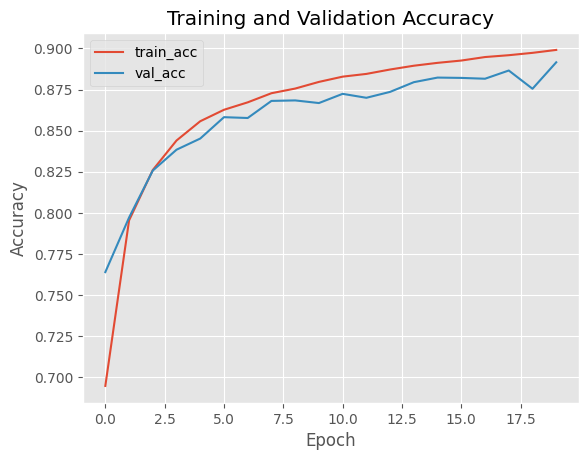

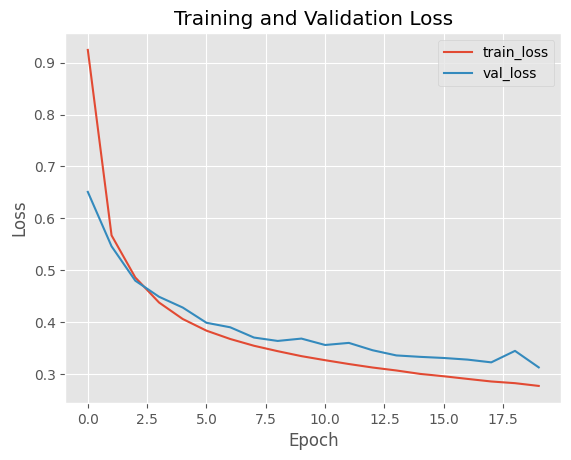

In [131]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [132]:
# estadísticas de desempeño de la red
predictions = model.predict(x_test, batch_size=n_batch)
print(classification_report(ytest.argmax(axis=1),
      predictions.argmax(axis=1),target_names=labels))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.81      0.82      1000
           3       0.90      0.89      0.89      1000
           4       0.79      0.84      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.71      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Se logró un resutlado de 0.89 en Accuracy para el modelo. Con las gráficas del coeficiente de pérdida y de accuracy podemos ver que el modelo se ha estancado. Esta es una vara alta para generar una red que pueda desempeñarse mejor.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


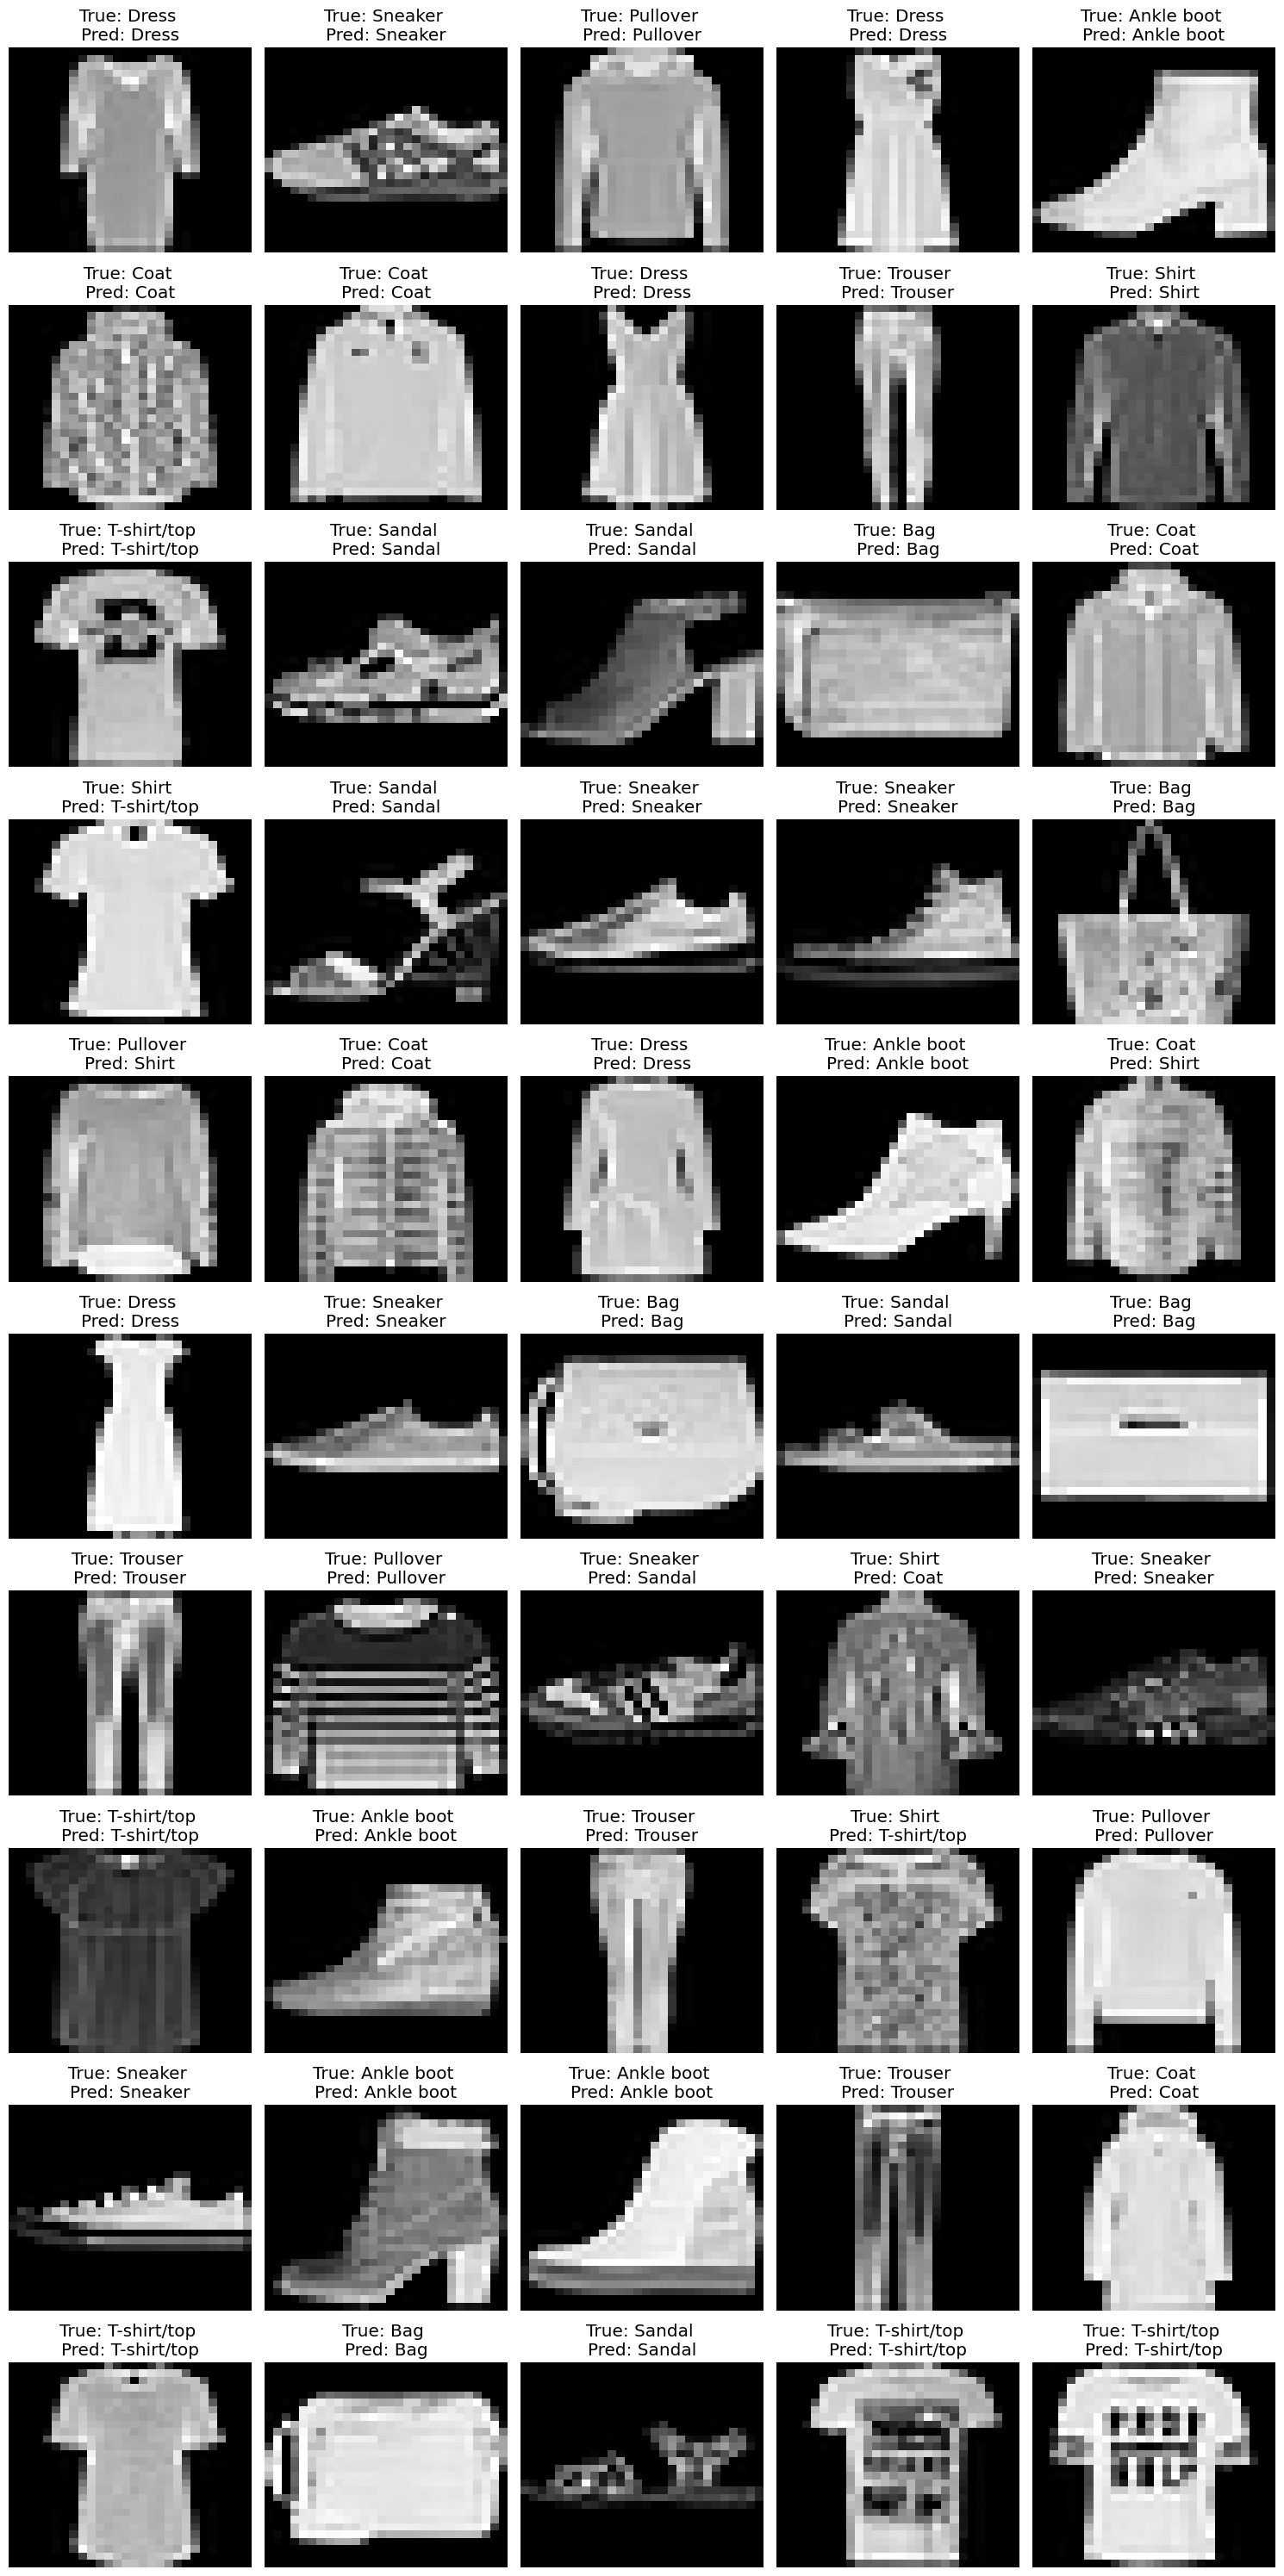

In [133]:
def plot_random_predictions(model, x_test, y_test, n_samples=50):
    indices = np.random.choice(range(x_test.shape[0]), size=n_samples, replace=False)
    selected_images = x_test[indices]
    true_labels = y_test[indices]
    predictions = model.predict(selected_images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(15, 30))
    for i in range(n_samples):
        plt.subplot(10, 5, i + 1)
        sns.heatmap(selected_images[i].reshape(28, 28), cmap='gray', cbar=False, xticklabels=False, yticklabels=False)
        true_label=np.argmax(true_labels[i])
        plt.title(f"True: {dicc[true_label]} \nPred: {dicc[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()

plot_random_predictions(model, x_test, ytest)

# Implementación basada en el tutorial de Jason Brownlee:
Antes de comenzar a realizar una estructura propia se propuso revisar una arquitectura de red diseñada específicametne para el dataset de Fashion_Mnist para ver cuáles eran las diferencia entre ambas arquitecturas
Fuente: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

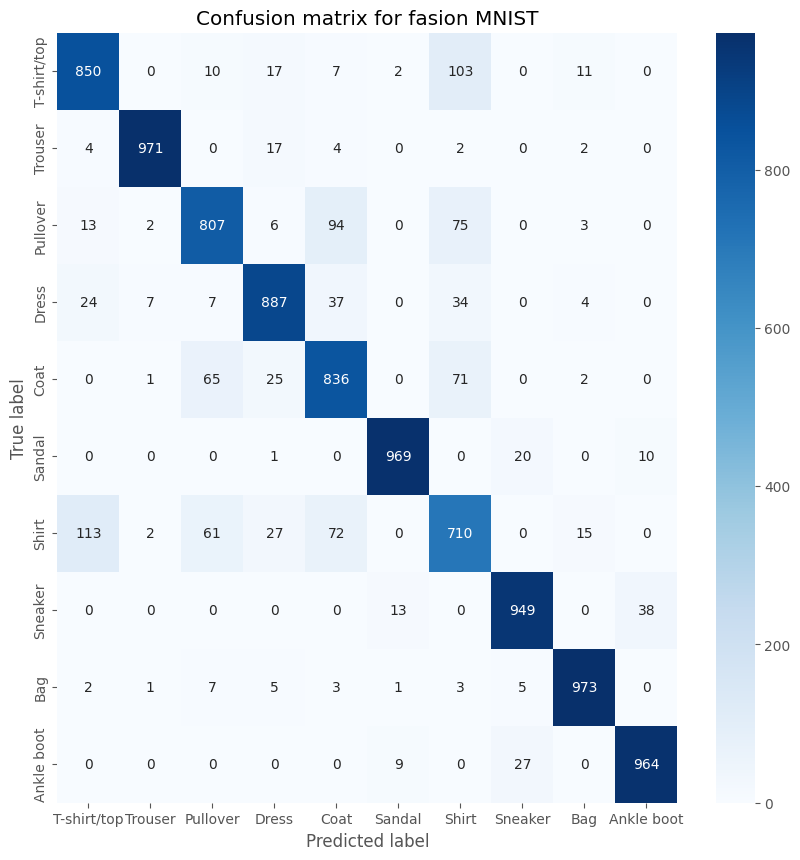

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def heatmap(ytest, predictions):
  labels= [
      "T-shirt/top",
      "Trouser",
      "Pullover",
      "Dress",
      "Coat",
      "Sandal",
      "Shirt",
      "Sneaker",
      "Bag",
      "Ankle boot"
  ]
  conf_mat = confusion_matrix(ytest.argmax(axis=1), predictions.argmax(axis=1))
  plt.figure(figsize=(10,10))
  sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, cmap='Blues',
            annot=True, fmt="d");
  plt.title("Confusion matrix for fasion MNIST")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
heatmap(ytest, predictions)

Se propone visualizar las categorías que confundió el modelo para intentar identificar el tipo de error que se está comentiendo

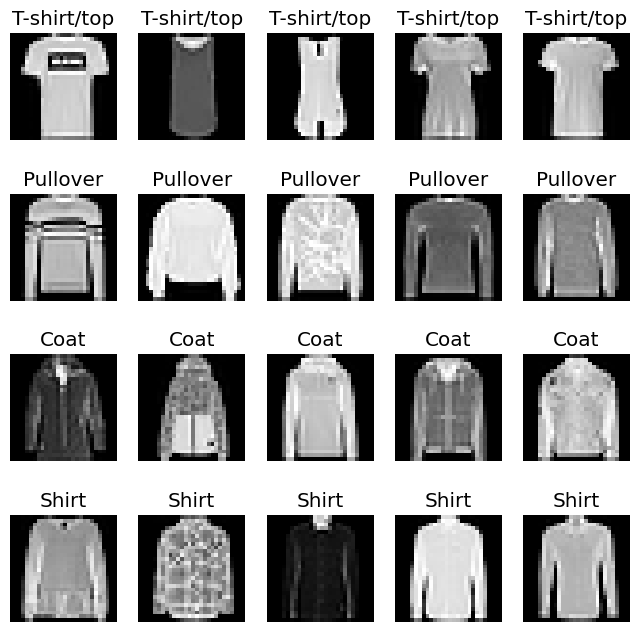

In [135]:
categories = [0,2,4,6]
indices=[]
for category in categories:
  indices.extend([i for i, label in enumerate(y_train) if label ==  category][:5])

fig = plt.figure(figsize=(8,8))
k=1
for i in indices:
  fig.add_subplot(4,5,k)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(dicc[y_train[i]])
  plt.axis('off')
  k += 1
plt.show()

In [136]:
from sklearn.model_selection import KFold

In [168]:
def define_model():
    model= tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(tf.keras.layers.AveragePooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    #Compile model
    opt= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Se puede notar que esta red tiene menos capas en general. Además usa funciones de activación 'relu' esto podría ayudar a hacer la red computacionalmente eficiente y propiciar la activación dispersa de neuronas debido a que aumenta la probabilidad de que el resultado de la activación sea cero, se eliminan los strides en a imágen y al optimizador le agrega un coeficiente de momento. La función del momento es utilizada para acelerar el descenso del gradiente y puede ayudar a evitar el oscilamiento de la función de pérdida en mínimos locales. A grandes resgos el momento introduce el concepto de velocidad a la razón de cambio del gradiente.
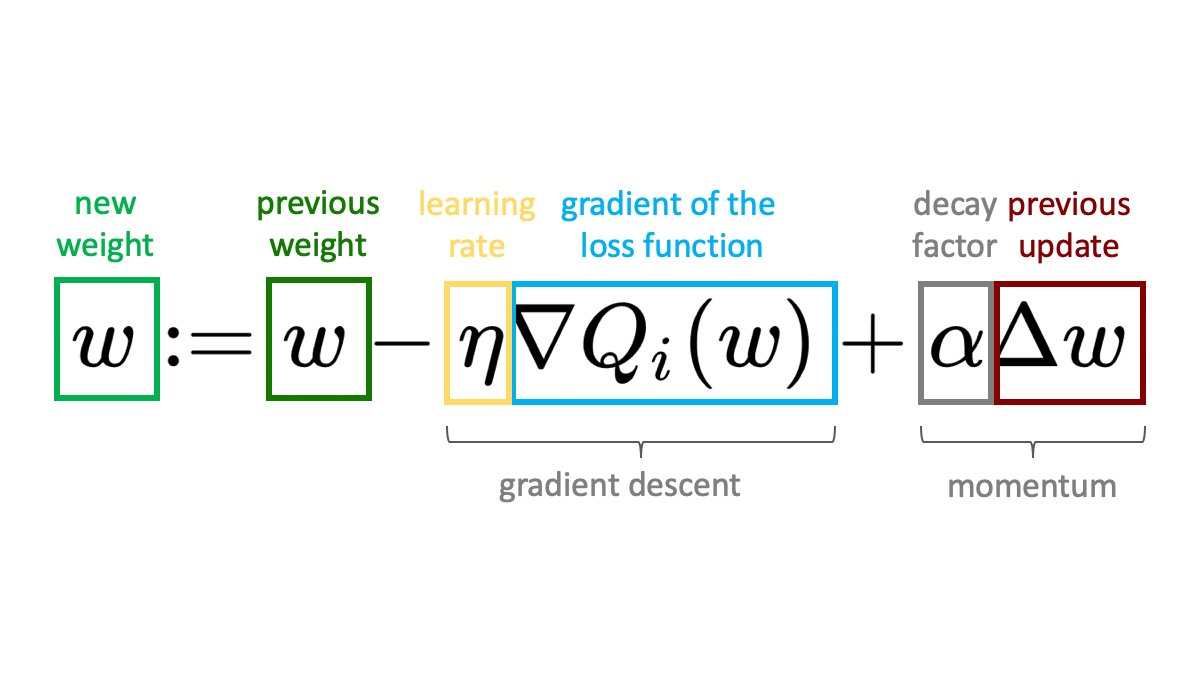

In [159]:
def evaluate_model(dataX, dataY, n_fold=5):
  scores, histories = list(), list()
  kfold = KFold(n_fold, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
    kfold= KFold(n_fold, shuffle=True, random_state=1)
    model = define_model()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [160]:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    #Loss plot
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    #Accuracy plot
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  pyplot.show()
def summarize_performance(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
  pyplot.boxplot(scores)
  pyplot.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> 88.600
> 88.992
> 87.908
> 88.558
> 88.492


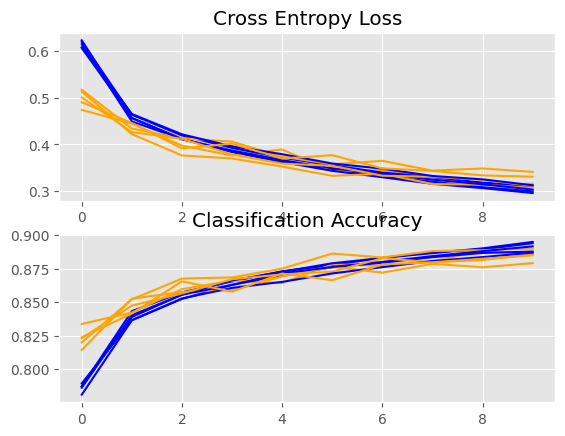

Accuracy: mean=88.510 std=0.348, n=5


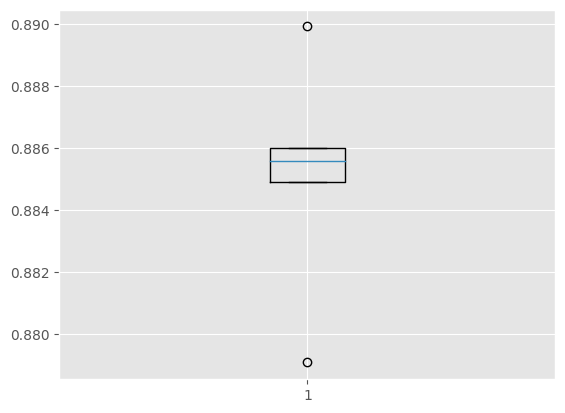

In [169]:
scores, histories = evaluate_model(x_train, ytrain)
summarize_diagnostics(histories)
summarize_performance(scores)

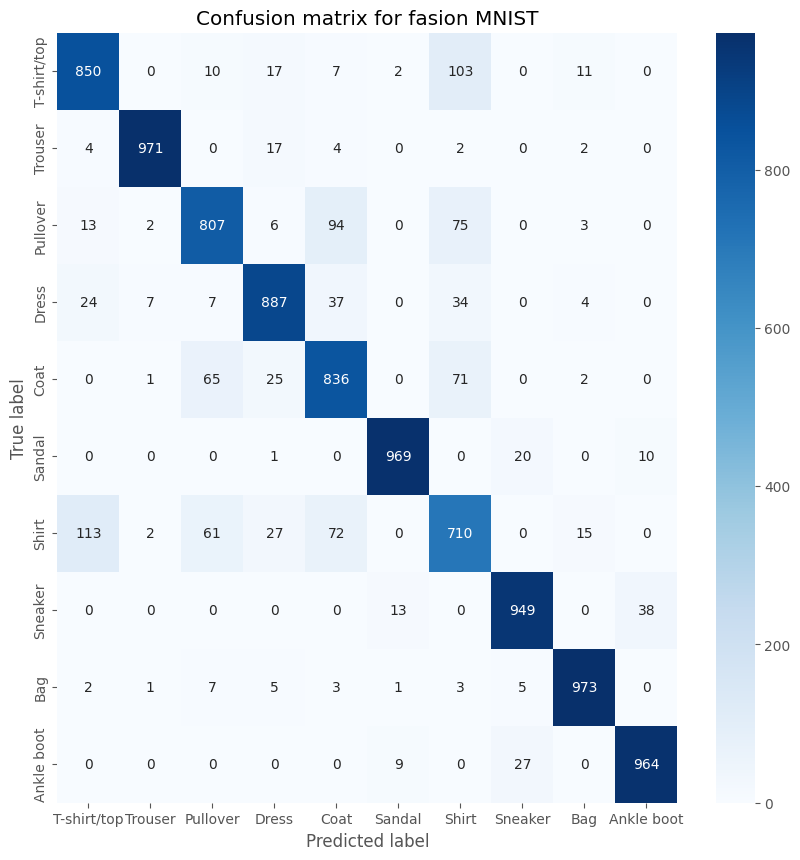

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


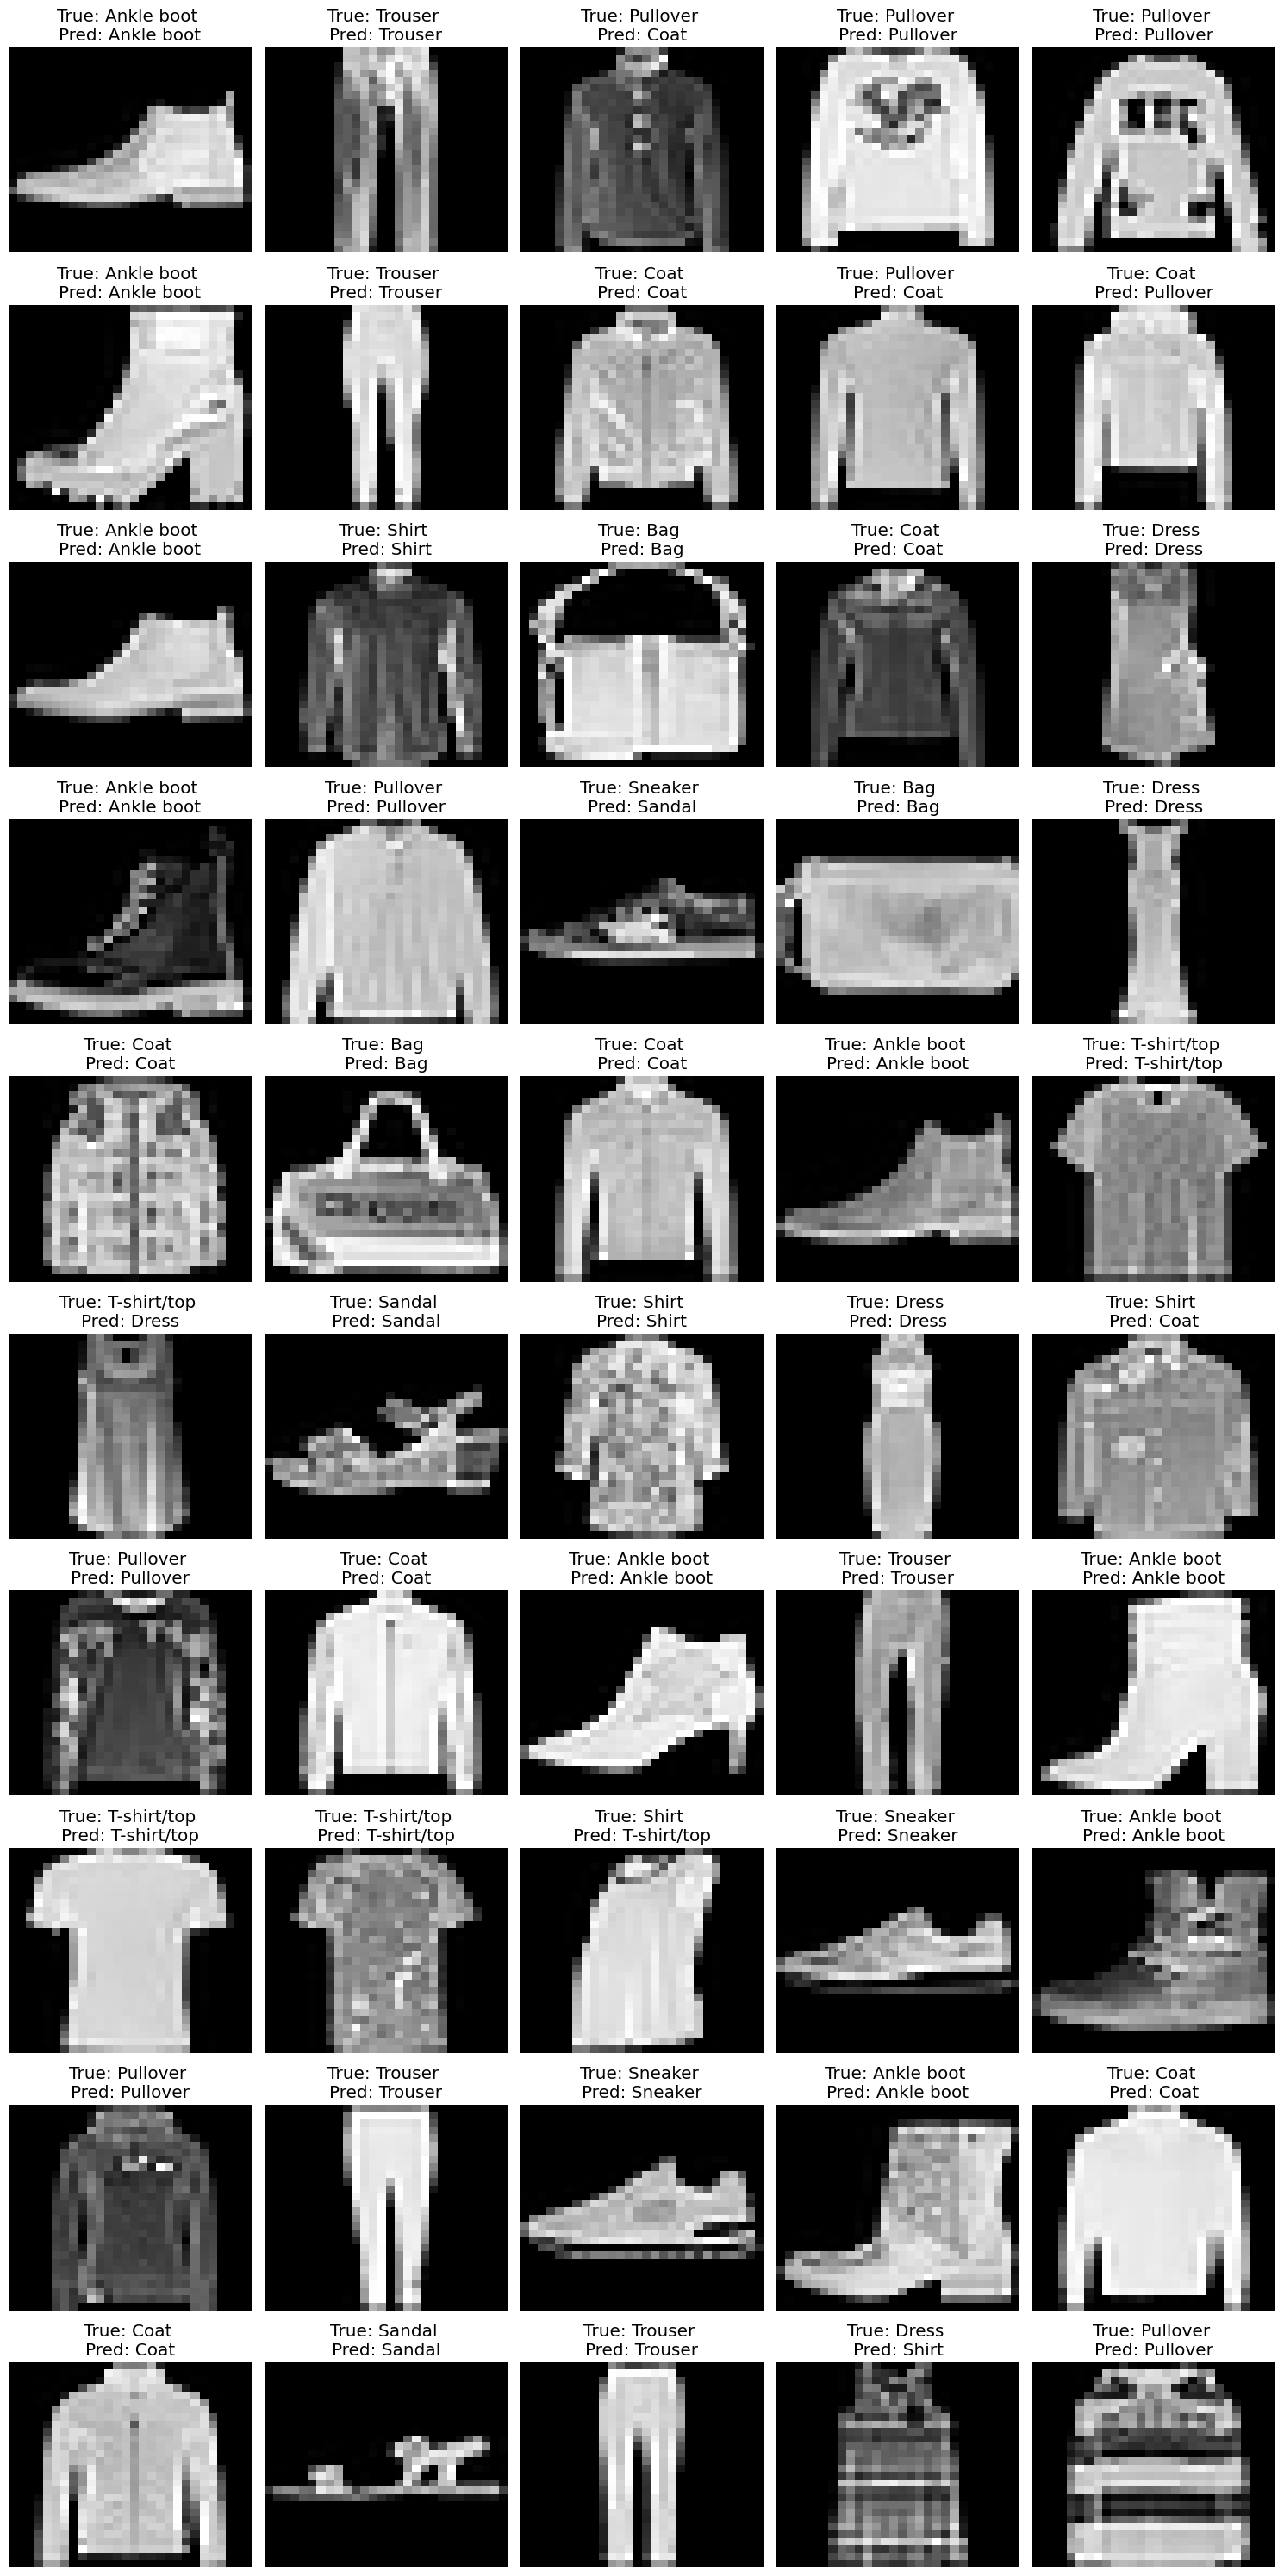

In [141]:
heatmap(ytest, predictions)
plot_random_predictions(model, x_test, ytest)

El modelo obtuvo resultados bastante similares a la red de LeNet-5. Se sospecha que el modelo puede mejorar si se incrementa el número de capas de convolución y si se agregan más neuronas en las capas densas

#Primera iteración de un modelo propio
Para este modelo y en base a los resultados obtenidos se decidió incrementar a dos capas convolucionales, una capa de Dropout y una penúltima capa densa con más neuronas. El propósito en general es permitir que el modelo sea capaz de encontrar más patrones dentro de las imágenes que le ayude a identificar mejor cada categoría.
Por otra parte la capa de Dropout mitiga los efectos del overfitting en la red al cambiar los inputs de ciertas unidades a 0 con una frecuencia determinada por el coeficiente asignado de forma que la suma en general de todas las entradas de la capa vea modificada.

Sobre la capa de dopout se destaca la siguiene descripción proveniente de la documentación de Tensorflow Keras:
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1 / (1 - rate) such that the sum over all inputs is unchanged.

Fuente: https://keras.io/api/layers/regularization_layers/dropout/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> 90.617
> 89.167
> 90.767
> 90.150
> 90.967


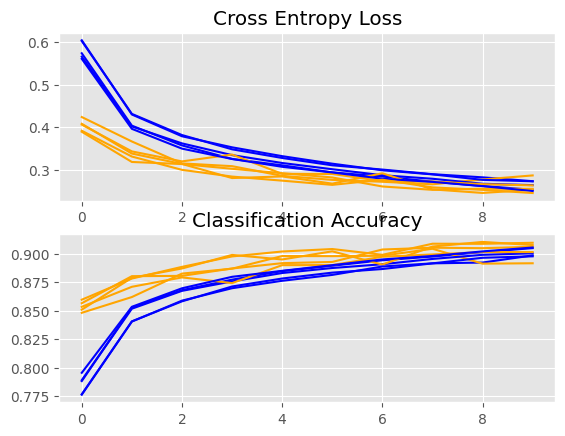

Accuracy: mean=90.333 std=0.642, n=5


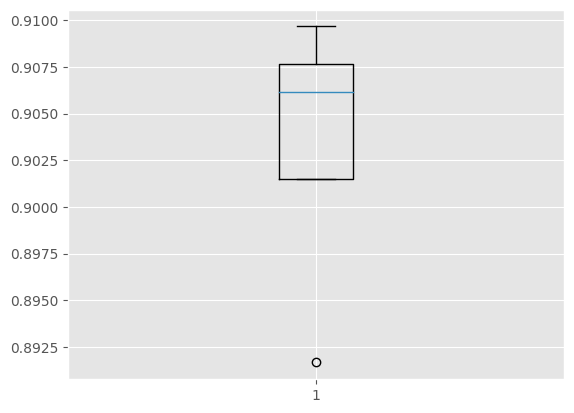

In [142]:
def define_model():
    model= tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    #Compile model
    opt= tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
scores, histories = evaluate_model(x_train, ytrain)
summarize_diagnostics(histories)
summarize_performance(scores)

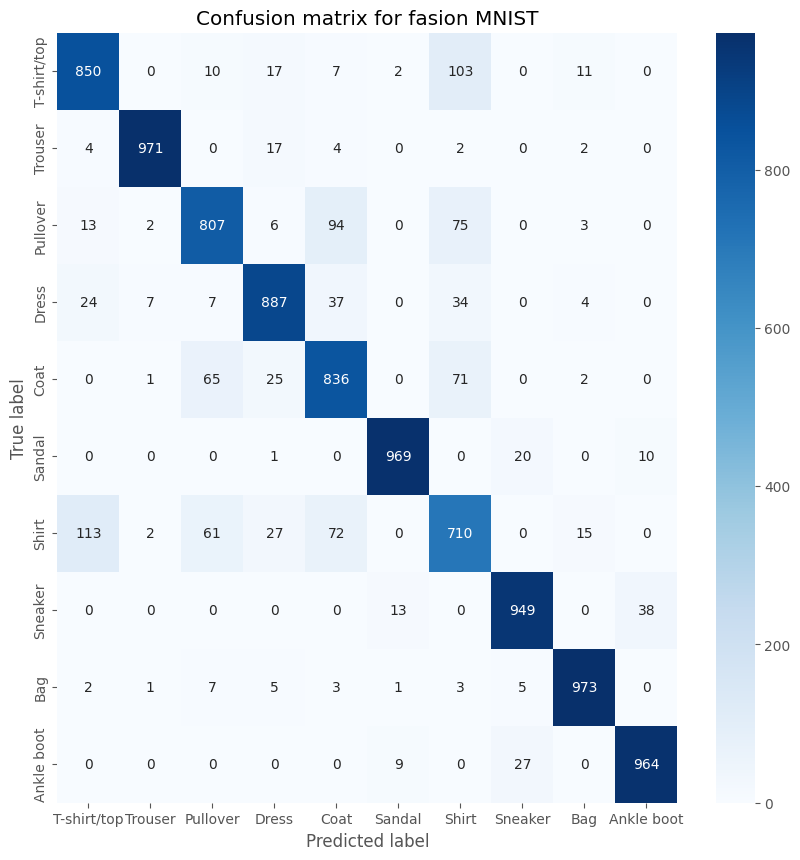

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


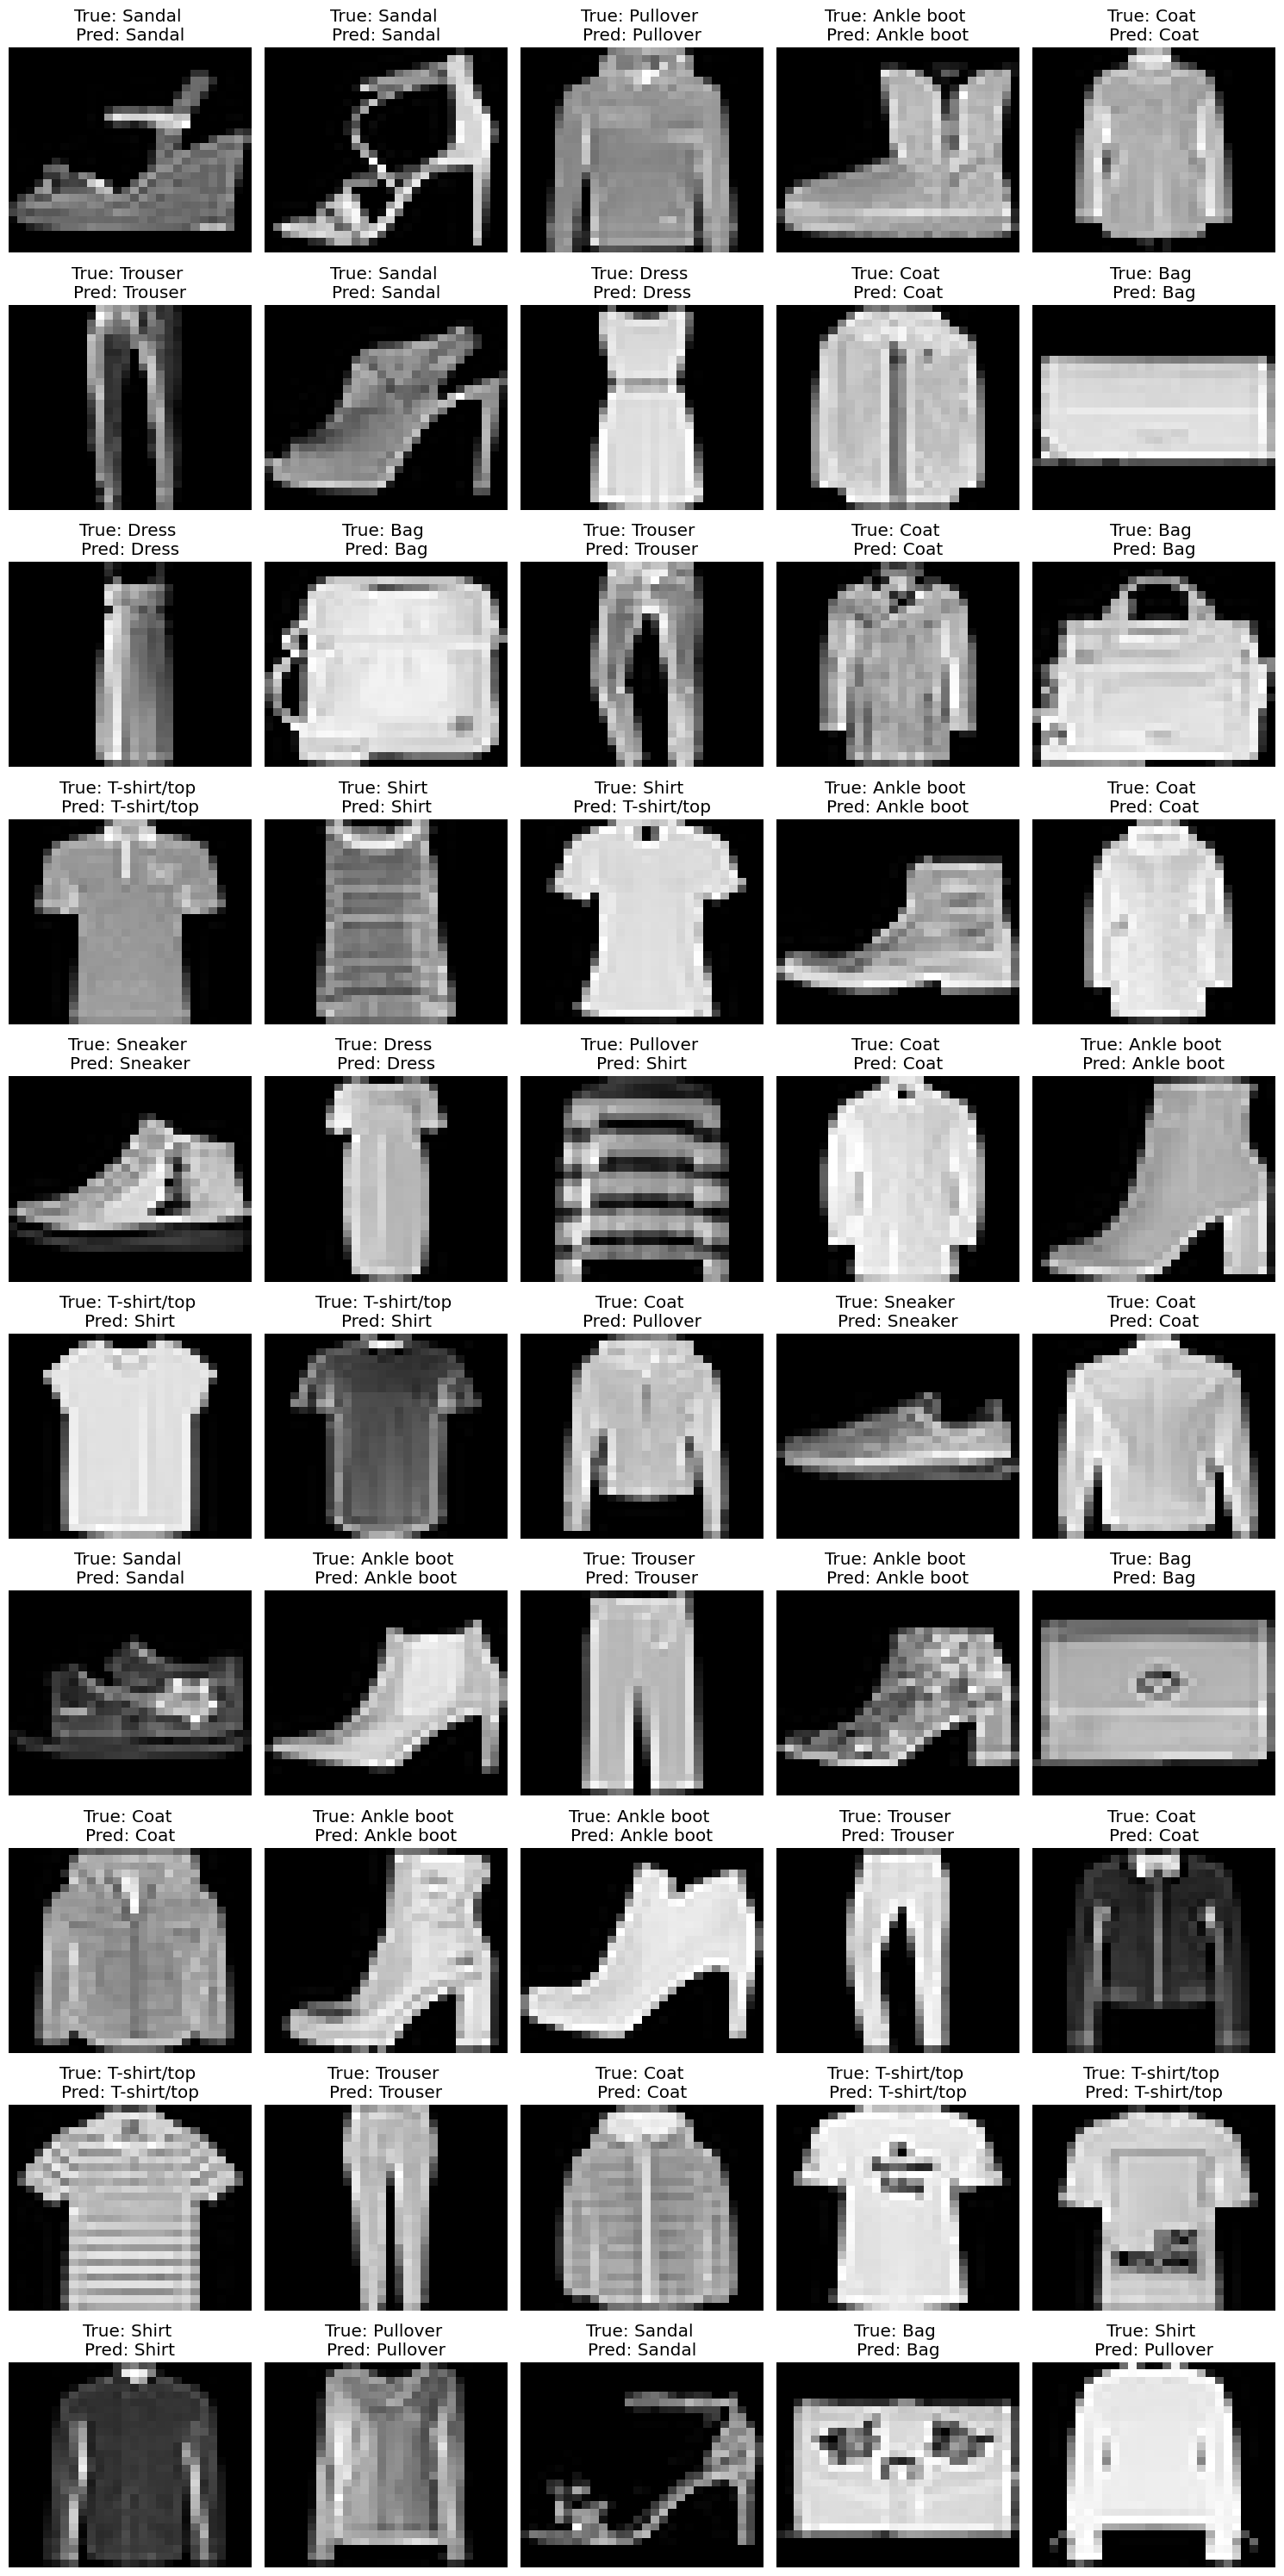

In [143]:
heatmap(ytest, predictions)
plot_random_predictions(model, x_test, ytest)

Los resultados de este modelo mejoran en poco más de 2% el valor del accuracy para la tarea de clasificación. Si bien existe una mejora se intentará generar un mejor modelo.

#Segunda iteración propia
En este segundo intento se quizo analizar si mejoraría el resultado teniendo un coeficiente menor en la capa de dropout y si disminuir la taza de aprendizaje lograría mejorar los resultados

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> 90.175
> 89.942
> 89.208
> 89.925
> 90.108


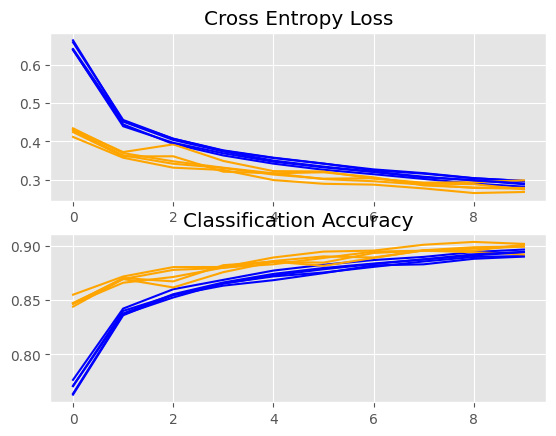

Accuracy: mean=89.872 std=0.345, n=5


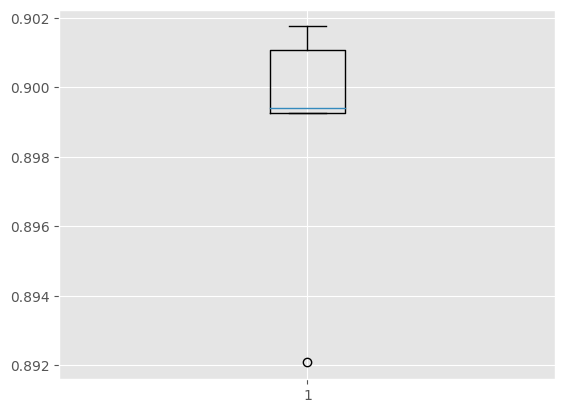

In [144]:
def define_model():
    model= tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    #Compile model
    opt= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
scores, histories = evaluate_model(x_train, ytrain)
summarize_diagnostics(histories)
summarize_performance(scores)

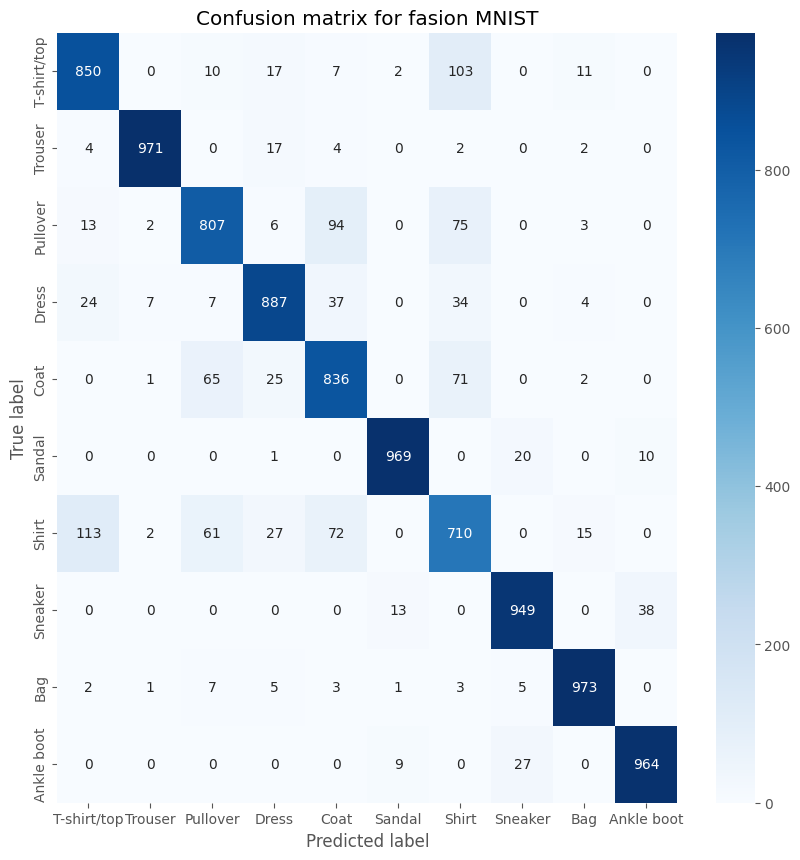

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


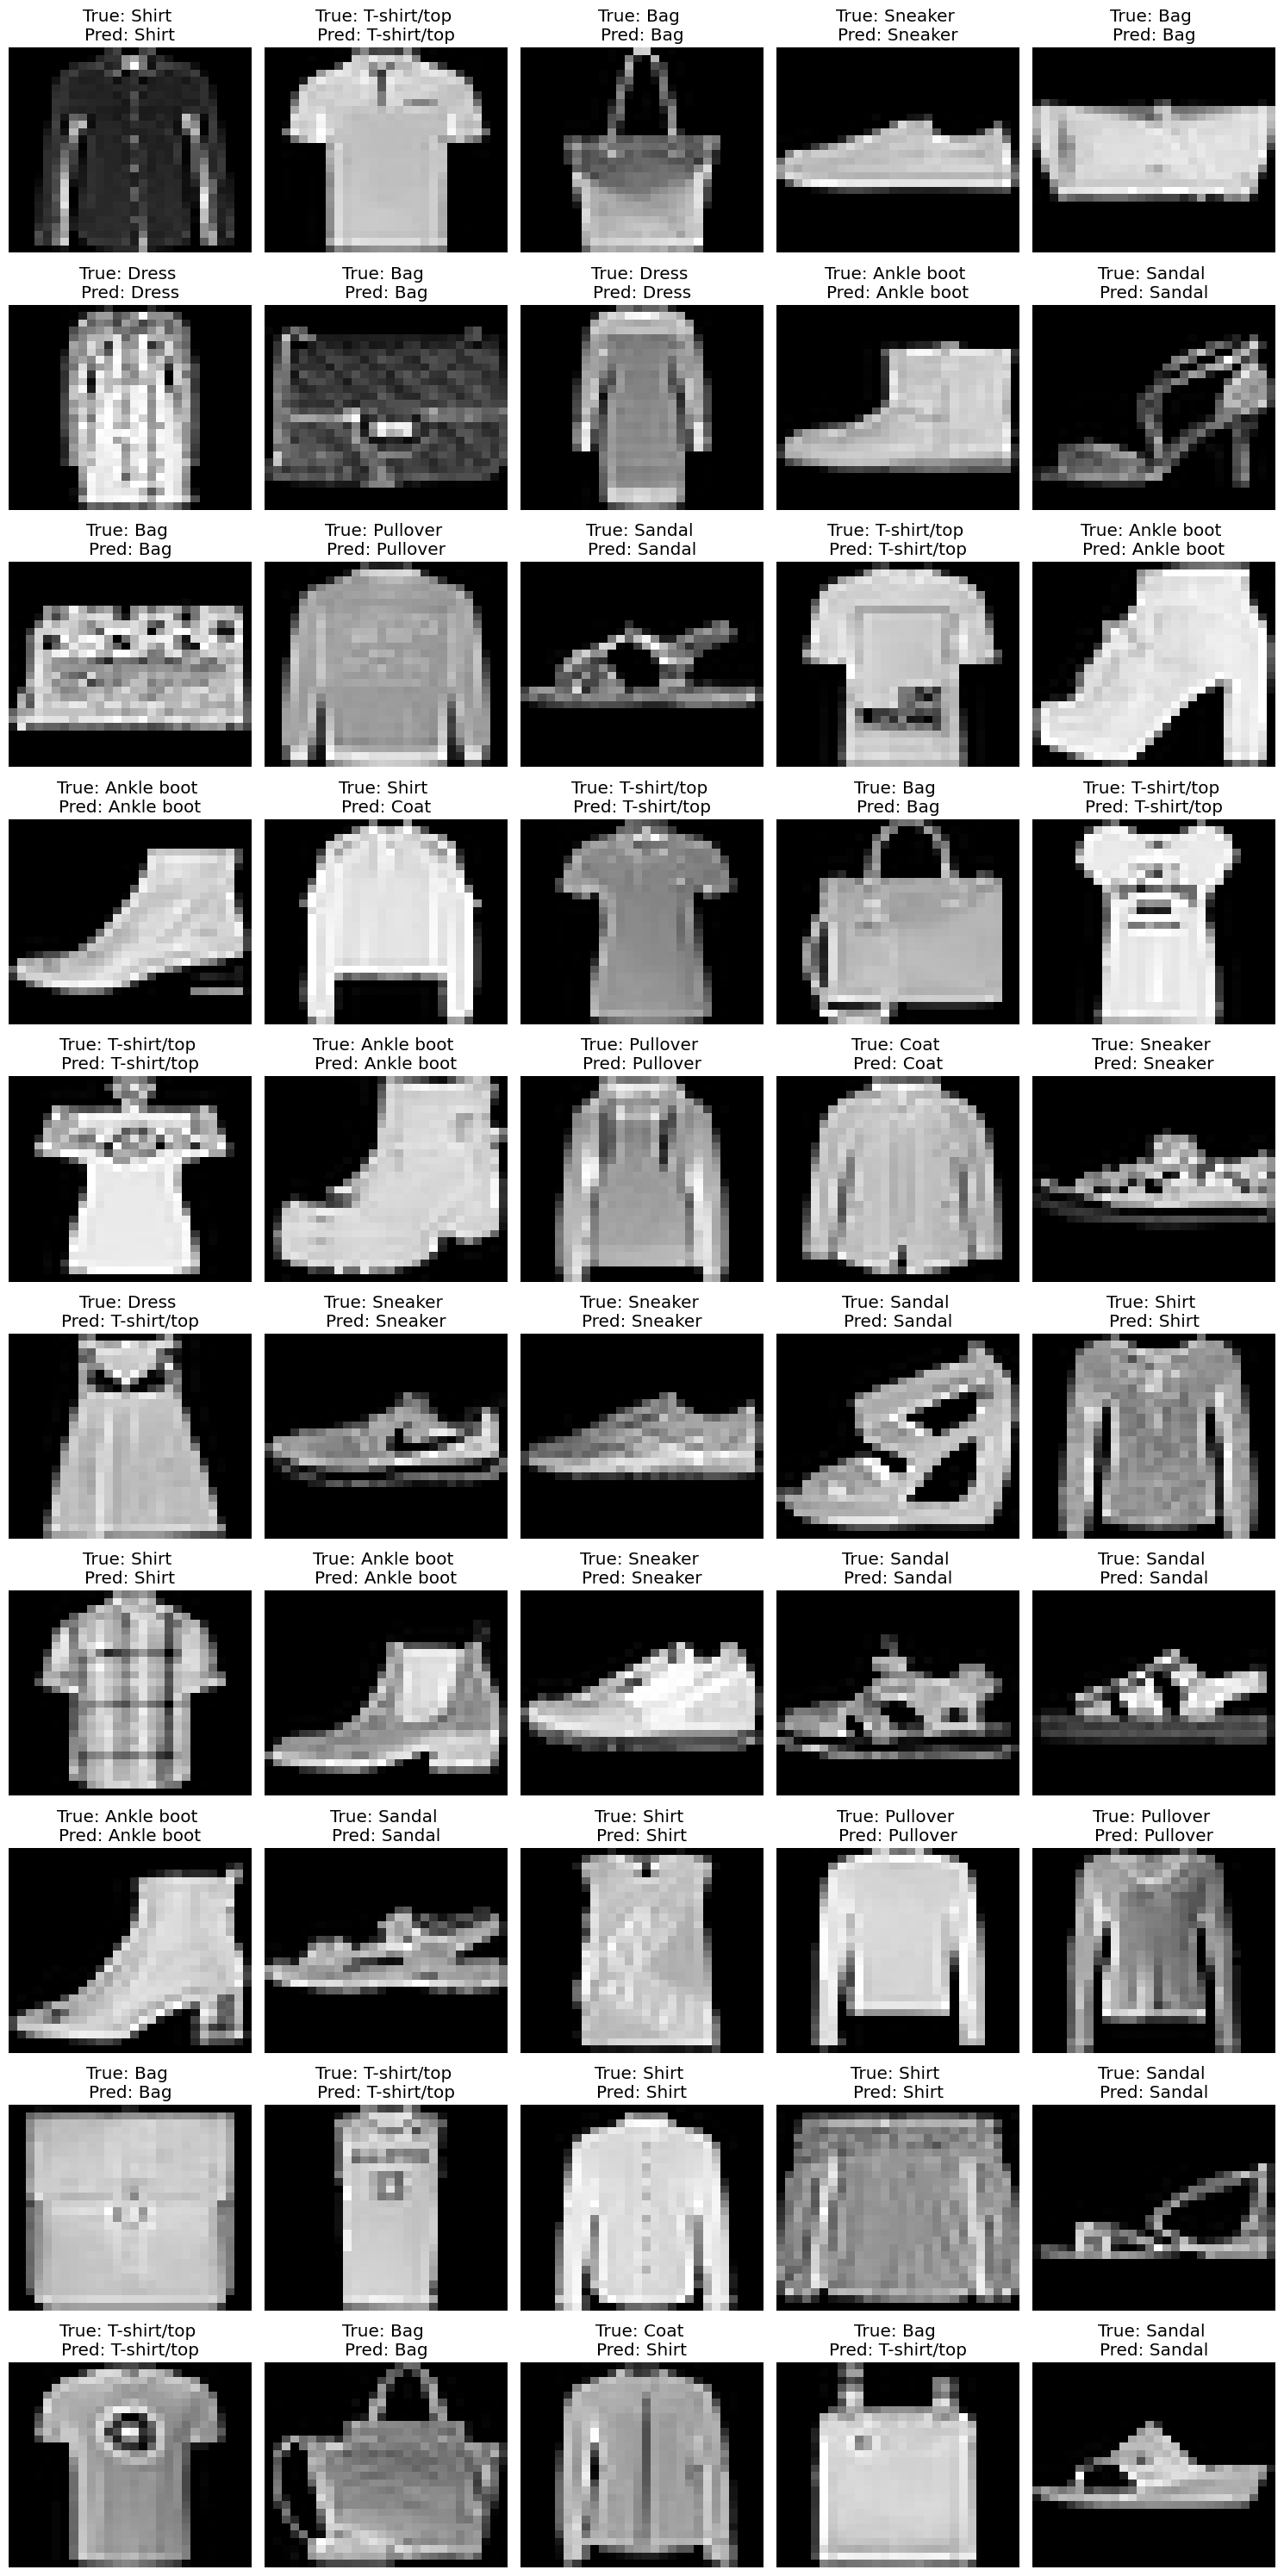

In [145]:
heatmap(ytest, predictions)
plot_random_predictions(model, x_test, ytest)

El resultado fue poco satisfactorio, pues el modelo no logró mejorar con estos cambios dentro de la arquitectura y los hiper parámetros. Se destaca que los resutlados en este caso fueron mucho más consistentes como se comprueba en el boxplot, pero ni siquiera los datos atípicos son tan buenos como la iteración pasada del modelo.

#Tercera iteración propia
En la tercera iteración se probó con utilizar la función de Batch normalization dentro de la arquitectura de la red. La idea detras de estas nuevas capas es que después de cada convolución se normalizan los valores generados por cada unidad para ajustarlos a una distribución con media cercana a 0 y con una desviación estandar cercana a 1. Esto evita que los valores de entrada para próximas capas cuenten con una gran variación y por esto puede ayudar a que las predicciones del modelo sean mejores.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> 92.025
> 90.933
> 92.458
> 91.650
> 92.108


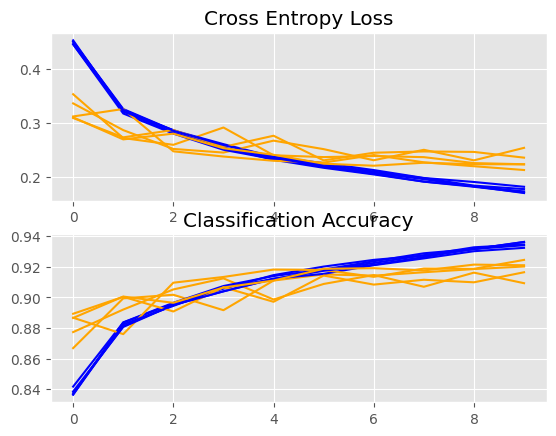

Accuracy: mean=91.835 std=0.519, n=5


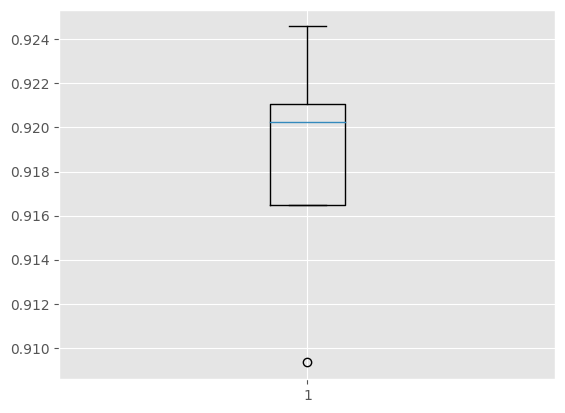

In [146]:
def define_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    #Compile model
    opt= tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
scores, histories = evaluate_model(x_train, ytrain)
summarize_diagnostics(histories)
summarize_performance(scores)

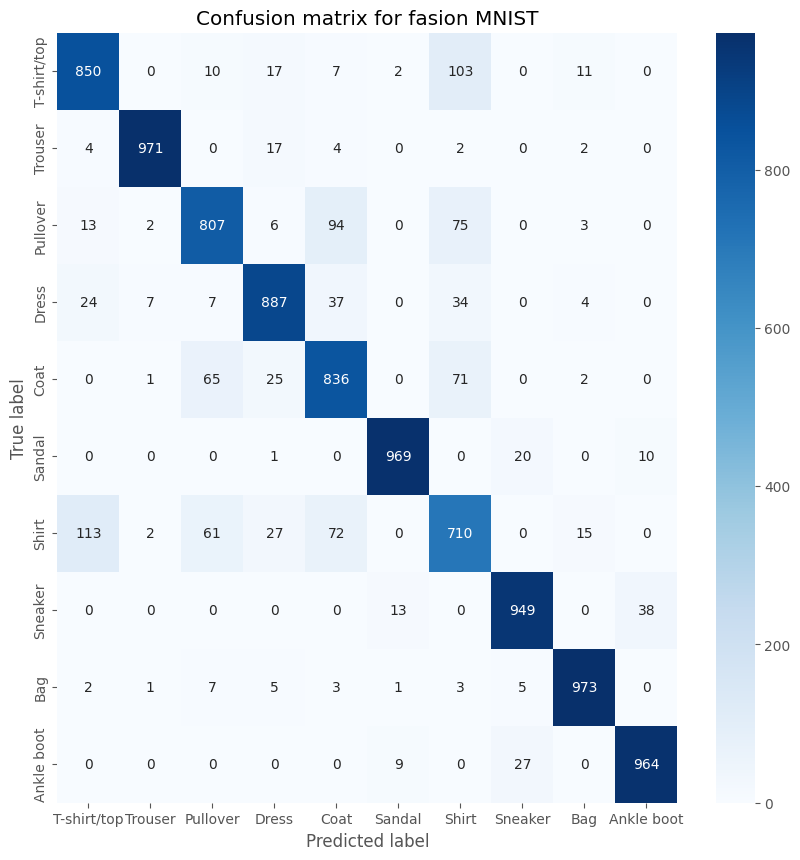

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


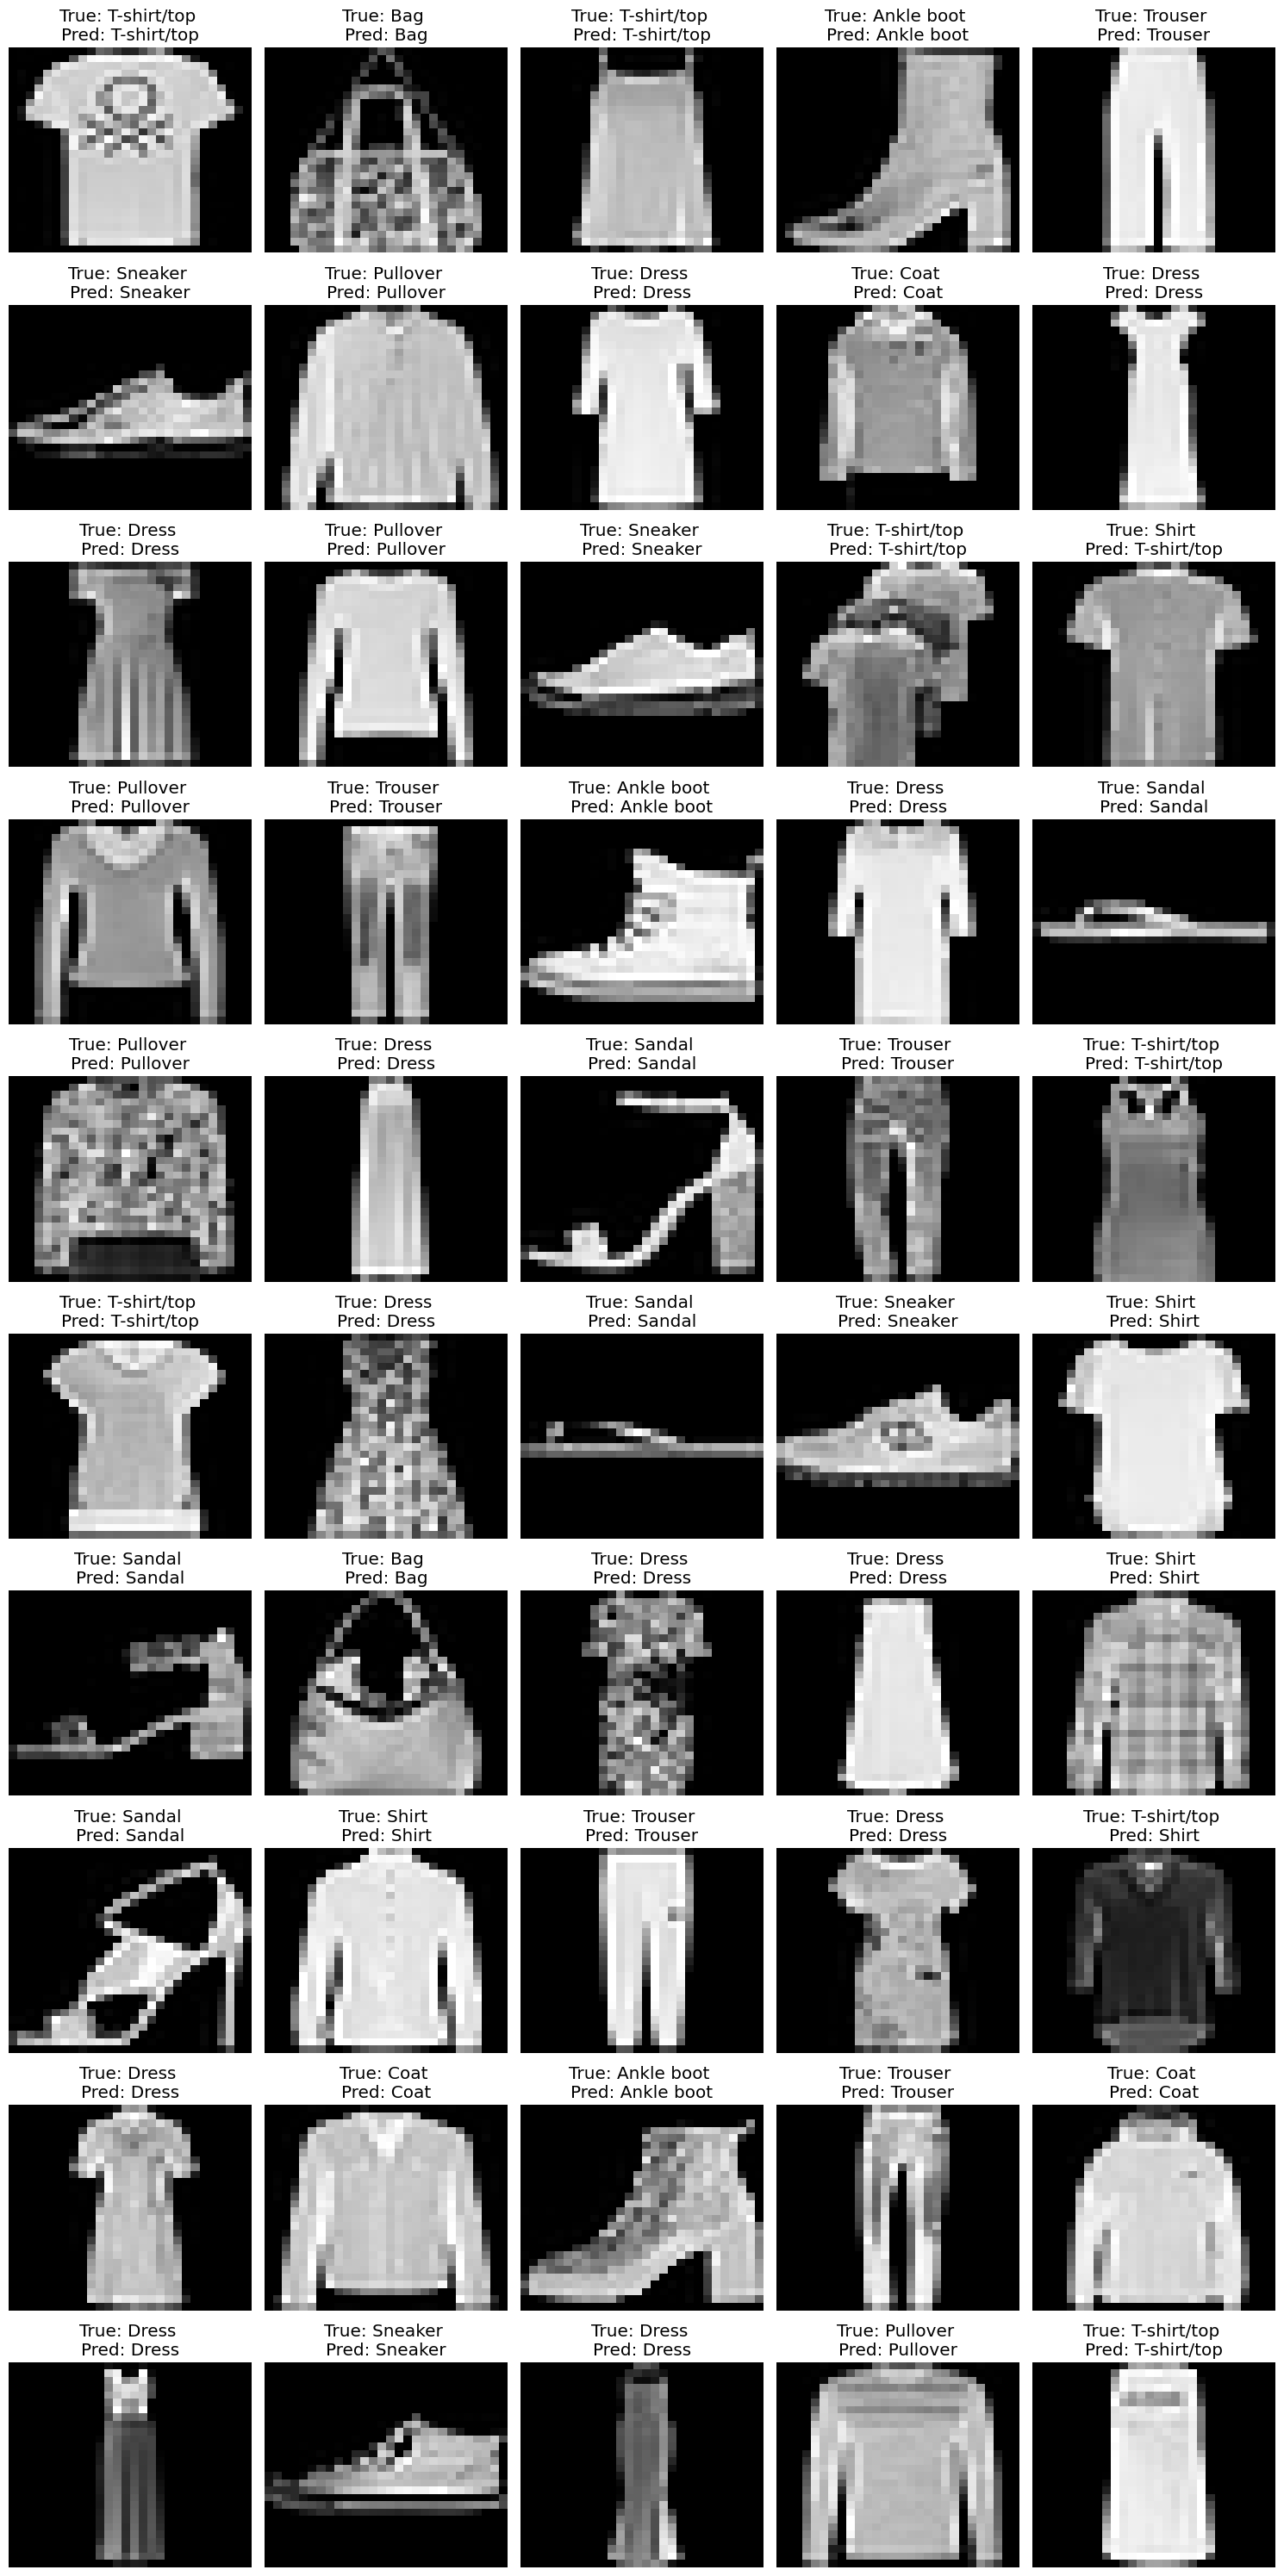

In [147]:
heatmap(ytest, predictions)
plot_random_predictions(model, x_test, ytest)

Este cambio a la arquitectura de la red mejoró casi en un 2% los resultados en comparación a al modelo previo y un 4% en comparación al modelo LeNet-5 y al modelo de Machine Learning Mastery. Dada que esta es la mejor arquitectura diseñada hasta el momento se propone hacer una afinación de hiper-parámetros mediante un GridSearch con Validación cruzada usando combinaciones de hiper-parámetros no utilizadas, pero que se desean probar

#Afinación de hiper-parámetros
Por último se propone implementar una búsqueda de parámetros con una validación cruzada de cada arrego de hiperparámetros para ver si alguna combinación distinta de hiperparámetros es capaz de obtener mejores resultados en la clasificación del dataset

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(optimizer='adam', init_mode='uniform', dropout_rate=0.0, activation='relu'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=activation, kernel_initializer=init_mode, input_shape=(28,28,1)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=activation, kernel_initializer=init_mode))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(128, activation=activation, kernel_initializer=init_mode))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # Compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the KerasClassifier
# Pass the build function to build_fn
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)

# Define the grid search parameters
# dropout_rate, init_mode and activation are moved inside the model__ param
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__init_mode': ['uniform', 'he_normal'],
    'model__dropout_rate': [0.3, 0.4, 0.5],
    'batch_size': [32, 64] # batch_size remains as is, as its a KerasClassifier param
}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, ytrain)


# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.918750 using {'batch_size': 32, 'model__dropout_rate': 0.5, 'model__init_mode': 'he_normal', 'model__optimizer': 'adam'}
0.907067 (0.008369) with: {'batch_size': 32, 'model__dropout_rate': 0.3, 'model__init_mode': 'uniform', 'model__optimizer': 'adam'}
0.907283 (0.001336) with: {'batch_size': 32, 'model__dropout_rate': 0.3, 'model__init_mode': 'uniform', 'model__optimizer': 'rmsprop'}
0.907650 (0.002477) with: {'batch_size': 32, 'model__dropout_rate': 0.3, 'model__init_mode': 'he_normal', 'model__optimizer': 'adam'}
0.916033 (0.000817) with: {'batch_size': 32, 'model__dropout_rate': 0.3, 'model__init_mode': 'he_normal', 'model__optimizer': 'rmsprop'}
0.889450 (0.029336) with: {'batch_size': 32, 'model__dropout_rate': 0.4, 'model__init_mode': 'uniform', 'model__optimizer': 'adam'}
0.907867 (0.008938) with: {'batch_size': 32, 'model__dropout_rate': 0.4, 'model__init_mode': 'uniform', 'model__optimizer': 'rmsprop'}
0.912100 (0.000502) with: {'batch_size': 32, 'model__dropout_rate'

Se detiene el proceso de búsqueda al ver que ningún modelo dentro del Grid Search ha logrado mejorar los resultados obtenidos, por lo que se define como mejor el modelo que utiliza las funciones de batch normalization en las capas convolucionales. Es decir, se concluye en este notebook que dentro de las estructuras de redes neuronales convolucionales la que arroja mejores resultados es la tercera iteración propia.

#Bibliografía
Academy, E. (2024, May 21). What are the key differences between activation functions such as sigmoid, tanh, and ReLU, and how do they impact the performance and training of neural networks? - EITCA Academy. EITCA Academy. https://eitca.org/artificial-intelligence/eitc-ai-adl-advanced-deep-learning/neural-networks/neural-networks-foundations/examination-review-neural-networks-foundations/what-are-the-key-differences-between-activation-functions-such-as-sigmoid-tanh-and-relu-and-how-do-they-impact-the-performance-and-training-of-neural-networks/
Blurredmachine. (2020, July 13). LeNet Architecture: A complete guide. https://www.kaggle.com/code/blurredmachine/lenet-architecture-a-complete-guide
Brownlee, J. (2019, December 3). A gentle introduction to batch normalization for deep neural networks. MachineLearningMastery.com. https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
GeeksforGeeks. (2024, February 15). What is Momentum in Neural Network? GeeksforGeeks. https://www.geeksforgeeks.org/what-is-momentum-in-neural-network/
Haltakov, V. (n.d.). SUBOPTIMaL - momentum. SUBOPTIMaL - Seriously Unnecessary Baffling Obscure Perplexing Terms in Machine Learning. https://suboptimal.wiki/explanation/momentum/
Keras. (n.d.). Keras documentation: Dropout layer. https://keras.io/api/layers/regularization_layers/dropout/
Lehn, F. V. (2023, December 25). Understanding the convolutional filter operation in CNN’s | Advanced Deep Learning. Medium. https://medium.com/advanced-deep-learning/cnn-operation-with-2-kernels-resulting-in-2-feature-mapsunderstanding-the-convolutional-filter-c4aad26cf32
Tamanna. (2023, April 24). Exploring convolutional neural networks: architecture, steps, use cases, and pros and cons. Medium. https://medium.com/@tam.tamanna18/exploring-convolutional-neural-networks-architecture-steps-use-cases-and-pros-and-cons-b0d3b7d46c71
